___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Claudia C. Castillejos Jáuregui </Strong>
- <Strong> Año </Strong>: 2021
</font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- Aplicar con éxito en la red neuronal a un problema de clasificación requiere que los valores de la red estén limitados en un rango de 0 y 1.
- Una transformación no lineal es incluída en el modelo de red neuronal. Usualmente esta transformación es una función sigmoidal. 

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

**Modelo matemático**

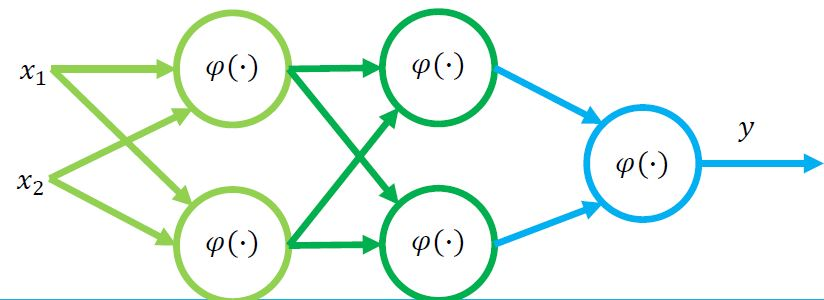

In [1]:
from IPython.display import Image
Image(filename='capa_oculta2.JPG', width=300, height=200)

<font color= #66CC00>$$\nu^{1} = w_{0}^{1}+w^{1}$$</font>
<font color= #66CC00>$$y^{1} = \varphi(\nu^{1})$$</font>
<font color= #009900>$$\nu^{2} = w_{0}^{2}+w^{2}y_{1}$$</font>
<font color= #009900>$$y^{2} = \varphi(\nu^{2})$$</font>
<font color= #3399FF>$$\nu^{3} = w_{0}^{3}+w^{3}y_{2}$$</font>
<font color= #3399FF>$$y^{3} = \varphi(\nu^{3})$$</font>

Para un problema de clasificación multiclase, el número de salidas aumenta en función del número de clases a clasificar

**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [2]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense, Dropout, Activation
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD


In [3]:
data = pd.read_csv(r'C:/Users/Castillejos/Tercer Semestre/Lab Modelado de Datos/diabetes.csv')

In [4]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [7]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser sigmoidal para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 0s 996us/step - loss: 0.6009 - accuracy: 0.6760
Epoch 2/200
6/6 [==============================] - 0s 997us/step - loss: 0.5961 - accuracy: 0.6778
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.6834
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5873 - accuracy: 0.6890
Epoch 5/200
6/6 [==============================] - 0s 906us/step - loss: 0.5832 - accuracy: 0.6965
Epoch 6/200
6/6 [==============================] - 0s 997us/step - loss: 0.5793 - accuracy: 0.6983
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5755 - accuracy: 0.7095
Epoch 8/200
6/6 [==============================] - 0s 997us/step - loss: 0.5719 - accuracy: 0.7095
Epoch 9/200
6/6 [==============================] - 0s 908us/step - loss: 0.5684 - accuracy: 0.7132
Epoch 10/200
6/6 [==============================] - 0s 797us/step - loss: 0.5650 - accuracy: 0.7132
Epoch 11/200
6/

6/6 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.7803
Epoch 84/200
6/6 [==============================] - 0s 997us/step - loss: 0.4755 - accuracy: 0.7803
Epoch 85/200
6/6 [==============================] - 0s 963us/step - loss: 0.4751 - accuracy: 0.7784
Epoch 86/200
6/6 [==============================] - 0s 998us/step - loss: 0.4747 - accuracy: 0.7784
Epoch 87/200
6/6 [==============================] - 0s 996us/step - loss: 0.4743 - accuracy: 0.7784
Epoch 88/200
6/6 [==============================] - 0s 797us/step - loss: 0.4740 - accuracy: 0.7765
Epoch 89/200
6/6 [==============================] - 0s 997us/step - loss: 0.4737 - accuracy: 0.7784
Epoch 90/200
6/6 [==============================] - 0s 900us/step - loss: 0.4733 - accuracy: 0.7784
Epoch 91/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.7784
Epoch 92/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4727 - accuracy: 0.7803
Epoch 93/200
6/6 [=

6/6 [==============================] - 0s 997us/step - loss: 0.4592 - accuracy: 0.7821
Epoch 166/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.7821
Epoch 167/200
6/6 [==============================] - 0s 996us/step - loss: 0.4590 - accuracy: 0.7803
Epoch 168/200
6/6 [==============================] - 0s 937us/step - loss: 0.4590 - accuracy: 0.7803
Epoch 169/200
6/6 [==============================] - 0s 797us/step - loss: 0.4589 - accuracy: 0.7803
Epoch 170/200
6/6 [==============================] - 0s 903us/step - loss: 0.4588 - accuracy: 0.7821
Epoch 171/200
6/6 [==============================] - 0s 996us/step - loss: 0.4588 - accuracy: 0.7803
Epoch 172/200
6/6 [==============================] - 0s 899us/step - loss: 0.4586 - accuracy: 0.7821
Epoch 173/200
6/6 [==============================] - 0s 993us/step - loss: 0.4585 - accuracy: 0.7803
Epoch 174/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.7803
Epoch 17

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

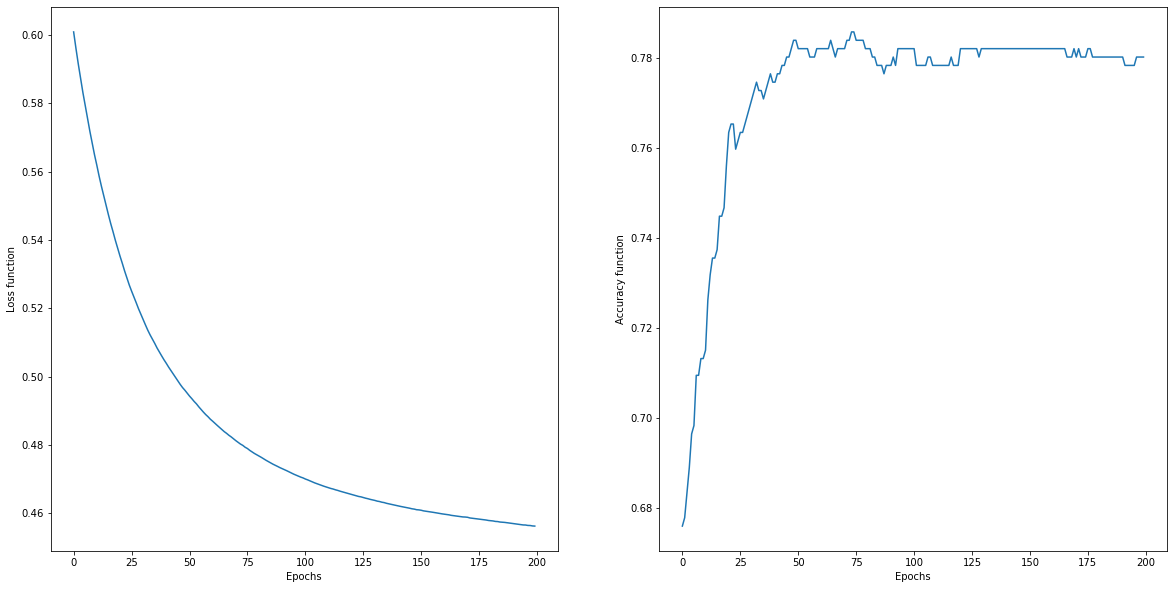

In [9]:
#Ver el performance del modelo en el entrenamiento
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(model_history.history['loss'])
plt.xlabel('Epochs'),plt.ylabel('Loss function')
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [10]:
#Usar el modelo para predecir
Y_prob = model.predict(X_test)
Y_pred = np.round(Y_prob).astype(int)

In [11]:
Y_prob

array([[0.24144942],
       [0.19584048],
       [0.11022082],
       [0.24374923],
       [0.541601  ],
       [0.37232268],
       [0.04578787],
       [0.60239494],
       [0.5753114 ],
       [0.7696151 ],
       [0.21376142],
       [0.8095254 ],
       [0.3956458 ],
       [0.3196327 ],
       [0.07955027],
       [0.33222434],
       [0.12380821],
       [0.07719168],
       [0.81789637],
       [0.6078717 ],
       [0.20193821],
       [0.06782544],
       [0.37863052],
       [0.07764331],
       [0.5988001 ],
       [0.8289031 ],
       [0.11931688],
       [0.0494222 ],
       [0.30991268],
       [0.11478812],
       [0.8062786 ],
       [0.8455292 ],
       [0.7872436 ],
       [0.76997006],
       [0.59480125],
       [0.75933826],
       [0.73961437],
       [0.19032693],
       [0.433073  ],
       [0.6811478 ],
       [0.07087564],
       [0.5358039 ],
       [0.5122849 ],
       [0.42970043],
       [0.06622484],
       [0.59053427],
       [0.58966535],
       [0.210

In [12]:
Y_pred

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [13]:
#Evaluar modelo
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

8/8 [==============================] - 0s 854us/step - loss: 0.5002 - accuracy: 0.7446
[0.5002292990684509, 0.7445887327194214]


In [14]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
Y_proba = model.predict(X_train)
Y_pred = np.round(Y_proba).astype(int)

accu_train = accuracy_score(Y_train,Y_pred)
prec_train = precision_score(Y_train,Y_pred)
reca_train = recall_score(Y_train,Y_pred)

Y_proba = model.predict(X_test)
Y_pred = np.round(Y_proba).astype(int)

accu_test = accuracy_score(Y_test,Y_pred)
prec_test = precision_score(Y_test, Y_pred)
reca_test = recall_score(Y_test, Y_pred)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.780 	 0.733 	 0.585
  Test 	 0.745 	 0.633 	 0.625


In [15]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)
Yhat = model_log.predict(X_train)

accu_train = accuracy_score(Y_train,Yhat)
prec_train = precision_score(Y_train,Yhat)
reca_train = recall_score(Y_train,Yhat)

Yhat = model_log.predict(X_test)
accu_test = accuracy_score(Y_test,Yhat)
prec_test = precision_score(Y_test,Yhat)
reca_test = recall_score(Y_test,Yhat)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.782 	 0.741 	 0.580
  Test 	 0.736 	 0.617 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [16]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

In [17]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
dummy_y = np_utils.to_categorical(Y).astype(int)

In [21]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [22]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [23]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


C:\Users\Castillejos\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
2/2 [==============================] - 1s 272ms/step - loss: 1.5232 - accuracy: 0.3417 - val_loss: 1.1039 - val_accuracy: 0.3667
Epoch 2/200
2/2 [==============================] - 0s 174ms/step - loss: 1.1133 - accuracy: 0.3500 - val_loss: 1.0608 - val_accuracy: 0.3333
Epoch 3/200
2/2 [==============================] - 0s 172ms/step - loss: 1.0643 - accuracy: 0.3333 - val_loss: 0.9713 - val_accuracy: 0.3333
Epoch 4/200
2/2 [==============================] - 0s 100ms/step - loss: 0.9544 - accuracy: 0.3333 - val_loss: 0.8902 - val_accuracy: 0.4000
Epoch 5/200
2/2 [==============================] - 0s 19ms/step - loss: 0.8759 - accuracy: 0.4083 - val_loss: 0.7961 - val_accuracy: 0.7000
Epoch 6/200
2/2 [==============================] - 0s 19ms/step - loss: 0.7903 - accuracy: 0.6583 - val_loss: 0.7626 - val_accuracy: 0.7000
Epoch 7/200
2/2 [==============================] - 0s 17ms/step - loss: 0.7499 - accuracy: 0.6417 - val_loss: 0.6814 - val_accuracy: 0.6000
Epoch 8/200
2/2 

2/2 [==============================] - 0s 16ms/step - loss: 0.4223 - accuracy: 0.8250 - val_loss: 0.5346 - val_accuracy: 0.6333
Epoch 60/200
2/2 [==============================] - 0s 16ms/step - loss: 0.5007 - accuracy: 0.6750 - val_loss: 0.4217 - val_accuracy: 0.8667
Epoch 61/200
2/2 [==============================] - 0s 16ms/step - loss: 0.4223 - accuracy: 0.8667 - val_loss: 0.4149 - val_accuracy: 0.8667
Epoch 62/200
2/2 [==============================] - 0s 17ms/step - loss: 0.4036 - accuracy: 0.8833 - val_loss: 0.4549 - val_accuracy: 0.6667
Epoch 63/200
2/2 [==============================] - 0s 22ms/step - loss: 0.4266 - accuracy: 0.7083 - val_loss: 0.4375 - val_accuracy: 0.8000
Epoch 64/200
2/2 [==============================] - 0s 18ms/step - loss: 0.4377 - accuracy: 0.7750 - val_loss: 0.3985 - val_accuracy: 0.8333
Epoch 65/200
2/2 [==============================] - 0s 19ms/step - loss: 0.3837 - accuracy: 0.8000 - val_loss: 0.3813 - val_accuracy: 0.9333
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 17ms/step - loss: 0.1029 - accuracy: 0.9833 - val_loss: 0.2938 - val_accuracy: 0.8667
Epoch 118/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1522 - accuracy: 0.9333 - val_loss: 0.1885 - val_accuracy: 0.9667
Epoch 119/200
2/2 [==============================] - 0s 17ms/step - loss: 0.1734 - accuracy: 0.9333 - val_loss: 0.1541 - val_accuracy: 0.9667
Epoch 120/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1042 - accuracy: 0.9667 - val_loss: 0.2916 - val_accuracy: 0.8667
Epoch 121/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1899 - accuracy: 0.9250 - val_loss: 0.1273 - val_accuracy: 0.9667
Epoch 122/200
2/2 [==============================] - 0s 22ms/step - loss: 0.1169 - accuracy: 0.9667 - val_loss: 0.1293 - val_accuracy: 0.9333
Epoch 123/200
2/2 [==============================] - 0s 18ms/step - loss: 0.1140 - accuracy: 0.9750 - val_loss: 0.2441 - val_accuracy: 0.8667
Epoch 124/200
2/2 [=

2/2 [==============================] - 0s 16ms/step - loss: 0.0948 - accuracy: 0.9750 - val_loss: 0.1089 - val_accuracy: 0.9667
Epoch 175/200
2/2 [==============================] - 0s 17ms/step - loss: 0.0891 - accuracy: 0.9750 - val_loss: 0.1454 - val_accuracy: 0.9333
Epoch 176/200
2/2 [==============================] - 0s 17ms/step - loss: 0.0885 - accuracy: 0.9667 - val_loss: 0.1245 - val_accuracy: 0.9333
Epoch 177/200
2/2 [==============================] - 0s 17ms/step - loss: 0.0846 - accuracy: 0.9833 - val_loss: 0.1058 - val_accuracy: 0.9667
Epoch 178/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0908 - accuracy: 0.9750 - val_loss: 0.1756 - val_accuracy: 0.9000
Epoch 179/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0953 - accuracy: 0.9583 - val_loss: 0.1456 - val_accuracy: 0.9333
Epoch 180/200
2/2 [==============================] - 0s 16ms/step - loss: 0.0873 - accuracy: 0.9667 - val_loss: 0.1275 - val_accuracy: 0.9667
Epoch 181/200
2/2 [=

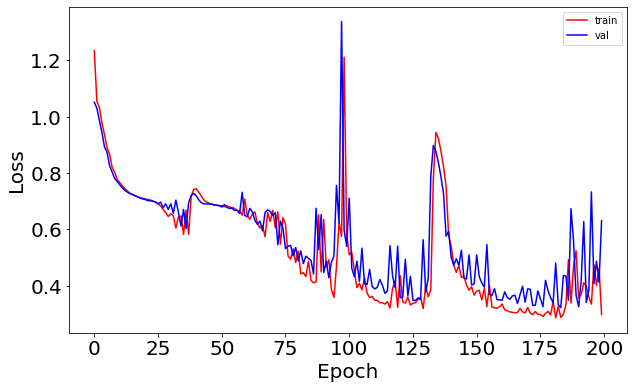

In [24]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [25]:
# Se pueden suavisar los picos si cambiamos los parametros del gradiente descendiente 

In [26]:
#Predecir con el modelo
Y_pred = model.predict(X)
Y_prob = np.round(Y_prob).astype(int)

In [27]:
#Evaluar el modelo
#score = model.evaluate(X, dummy_y,verbose=1)
#print(score)

score = model.evaluate(X_test,y_test)
print(score)

1/1 [==============================] - 0s 14ms/step - loss: 0.3974 - accuracy: 0.8667
[0.3974243700504303, 0.8666666746139526]


In [28]:
#Reverse
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [32]:
#Más métricas
from sklearn.metrics import (accuracy_score, precision_score, recall_score)
from sklearn.metrics import (accuracy_score, precision_score, recall_score)
accu_train = accuracy_score(Y,np.argmax(model.predict(X), axis=-1))
prec_train = precision_score(Y,np.argmax(model.predict(X), axis=-1),average='weighted')
reca_train = recall_score(Y,np.argmax(model.predict(X), axis=-1),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train))

 	 Accu 	 Prec 	 Reca
 Train 	 0.913 	 0.926 	 0.913


In [33]:
#CORREGIDO
#Más métricas corregido
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')

Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.925 	 0.933 	 0.925
  Test 	 0.867 	 0.908 	 0.867


In [34]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
Yhat = model_log.predict(X_test)

accu_train = accuracy_score(y_train,model_log.predict(X_train))
prec_train = precision_score(y_train,model_log.predict(X_train),average='weighted')
reca_train = recall_score(y_train,model_log.predict(X_train),average='weighted')

accu_test = accuracy_score(y_test,model_log.predict(X_test))
prec_test = precision_score(y_test,model_log.predict(X_test),average='weighted')
reca_test = recall_score(y_test,model_log.predict(X_test),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.975 	 0.977 	 0.975
  Test 	 1.000 	 1.000 	 1.000


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Claudia C. Castillejos Jáuregui.
</footer>